In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston_df, boston.target, test_size = 0.25, random_state = 31)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [5]:
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True)
X_train_fb = fb.fit_transform(X_train)
X_test_fb = fb.transform(X_test)
X_train_fb['CRIM'][:10]

operation       <=                                                        \
value     0.037314 0.059438 0.091626 0.141662 0.229270 0.489478 1.374682   
90               0        1        1        1        1        1        1   
434              0        0        0        0        0        0        0   
384              0        0        0        0        0        0        0   
175              0        0        1        1        1        1        1   
22               0        0        0        0        0        0        1   
54               1        1        1        1        1        1        1   
62               0        0        0        1        1        1        1   
320              0        0        0        0        1        1        1   
199              1        1        1        1        1        1        1   
273              0        0        0        0        1        1        1   

operation                          >                                      \
value     4.849966 9.842102 0.037314 0.059438 0.091626 0.141662 0.229270   
90               1        1        1        0        0        0        0   
434              0        0        1        1        1        1        1   
384              0        0        1        1        1        1        1   
175              1        1        1        1        0        0        0   
22               1        1        1        1        1        1        1   
54               1        1        0        0        0        0        0   
62               1        1        1        1        1        0        0   
320              1        1        1        1        1        1        0   
199              1        1        0        0        0        0        0   
273              1        1        1        1        1        1        0   

operation                                      
value     0.489478 1.374682 4.849966 9.842102  
90               0        0        0        0  
434              1        1        1        1  
384              1        1        1        1  
175              0        0        0        0  
22               1        0        0        0  
54               0        0        0        0  
62               0        0        0        0  
320              0        0        0        0  
199              0        0        0        0  
273              0        0        0        0

In [6]:
from aix360.algorithms.rbm import GLRMExplainer, LinearRuleRegression

In [7]:
linear_model = LinearRuleRegression()
explainer = GLRMExplainer(linear_model)
explainer.fit(X_train_fb, Y_train)

In [8]:
Y_pred = explainer.predict(X_test_fb)

In [9]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, max_error
print(f'R2 Score = {r2_score(Y_test, Y_pred)}')
print(f'Explained Variance = {explained_variance_score(Y_test, Y_pred)}')
print(f'Mean abs. error = {mean_absolute_error(Y_test, Y_pred)}')
print(f'Max error = {max_error(Y_test, Y_pred)}')

R2 Score = 0.8249087941706609
Explained Variance = 0.8289797066674642
Mean abs. error = 2.754048495903457
Max error = 11.399762504643611


In [10]:
explainer.explain()

,rule,coefficient
0,(intercept),21.944
1,NOX <= 0.66,6.31439
2,RM <= 7.16 AND DIS > 1.62,-5.78581
3,LSTAT <= 4.66,5.4635
4,DIS <= 3.32 AND RAD > 2.00 AND B > 295.98 AND ...,4.80349
5,CHAS not AND PTRATIO > 16.10,-3.9513
6,RM <= 7.16 AND RAD <= 6.00,-3.35462
7,TAX > 293.00 AND LSTAT > 4.66,-2.96268
8,LSTAT <= 15.03,2.84329
9,INDUS > 4.05 AND LSTAT > 4.66,-2.56005


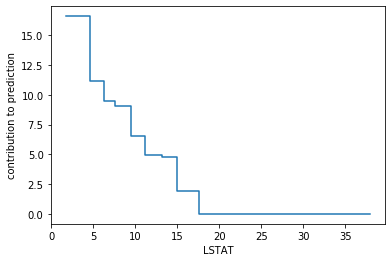

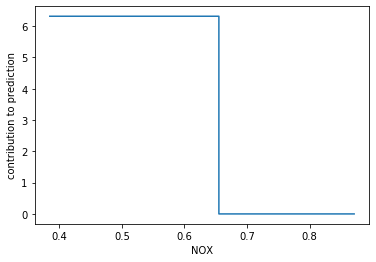

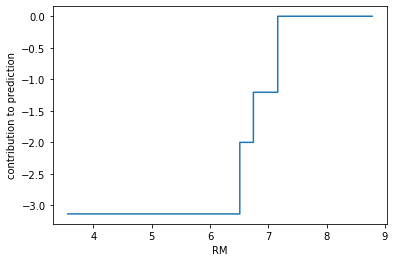

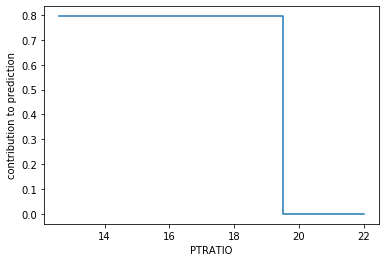

In [11]:
%matplotlib inline

fb = FeatureBinarizer(negations=True)
figs, _ = explainer.visualize(boston_df, fb)